In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from sklearn.metrics import accuracy_score
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('yelp.csv')

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


<Axes: xlabel='stars', ylabel='count'>

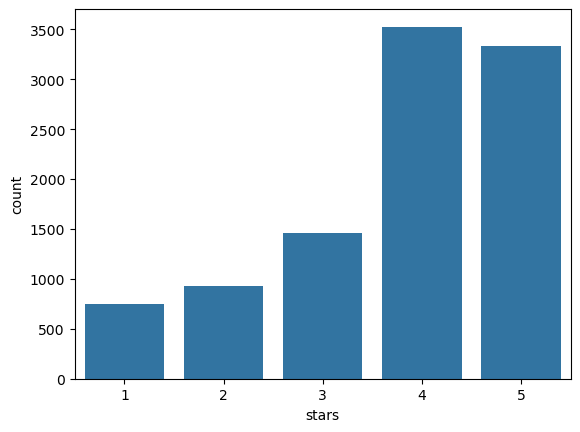

In [4]:
sns.countplot(x=df['stars'])

In [5]:
df['text']=df['text'].str.lower() # kucuk harfe cevir
df['text']=df['text'].str.replace('[^\w\s]','', regex=True) # noktolama isaretlerini kaldirir
df['text']=df['text'].str.replace('\d+','', regex=True) # rakamlari kaldirir
df['text']=df['text'].str.replace('\n','', regex=True) # satir sonlarini kaldirir
df['text']=df['text'].str.replace('\r','', regex=True) # enter lari kaldiri

In [6]:
ybw=df[(df.stars==1) | (df.stars==5)]

In [7]:
ybw = ybw.reset_index(drop=True)

In [8]:
x=ybw['text']
y=ybw[['stars']]

<Axes: xlabel='stars', ylabel='count'>

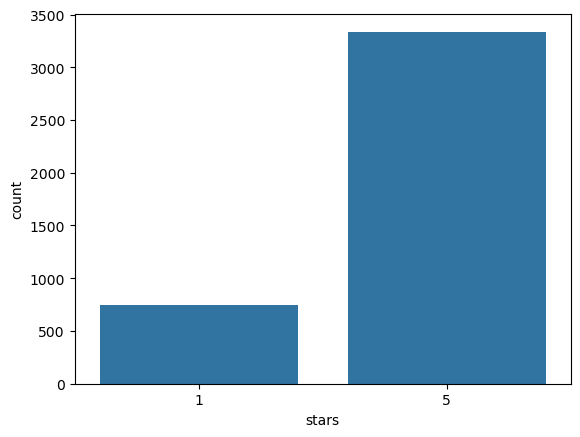

In [9]:
sns.countplot(x=y['stars'])

In [10]:
d={1:0,5:1}
y.loc[:,'stars']=y['stars'].map(d)

<Axes: xlabel='stars', ylabel='count'>

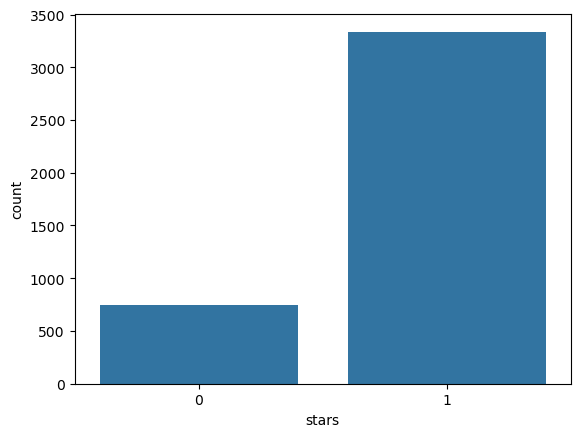

In [11]:
sns.countplot(x=y['stars'])

In [12]:
def ekkok(text):
    words=TextBlob(text).words
    return [word.lemmatize() for word in words]

In [13]:
x.head()

0    my wife took me here on my birthday for breakf...
1    i have no idea why some people give bad review...
2    rosie dakota and i love chaparral dog park its...
3    general manager scott petello is a good egg no...
4    drop what youre doing and drive here after i a...
Name: text, dtype: object

In [14]:
vect=CountVectorizer(analyzer=ekkok,stop_words='english',ngram_range=(1,2))

In [15]:
x_vect=vect.fit_transform(x).toarray()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:533: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [16]:
x_vect.shape

(4086, 22548)

In [17]:
tf=pd.DataFrame(vect.fit_transform(x).toarray(),columns=vect.get_feature_names_out())

In [18]:
tf

,a,aa,aaa,aaaamazingthey,aaammmazzingits,aaron,aathis,ab,aback,abandoned,...,zuchinni,zumba,zupa,zupas,zuzu,zuzus,zwiebelkräuter,éclairs,école,ém
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4082,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4083,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4084,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_vect,y, test_size=0.2, random_state=42)

In [24]:
model=Sequential([
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(96, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.fit(x_train,y_train, batch_size=32, validation_data=(x_test,y_test), verbose=2, epochs=20)

Epoch 1/20
103/103 - 3s - 33ms/step - accuracy: 0.8813 - loss: 0.2967 - val_accuracy: 0.8985 - val_loss: 0.2416
Epoch 2/20
103/103 - 2s - 19ms/step - accuracy: 0.9767 - loss: 0.0731 - val_accuracy: 0.9144 - val_loss: 0.2607
Epoch 3/20
103/103 - 2s - 19ms/step - accuracy: 0.9963 - loss: 0.0145 - val_accuracy: 0.9205 - val_loss: 0.3770
Epoch 4/20
103/103 - 2s - 19ms/step - accuracy: 0.9976 - loss: 0.0117 - val_accuracy: 0.9205 - val_loss: 0.4645
Epoch 5/20
103/103 - 2s - 18ms/step - accuracy: 0.9988 - loss: 0.0041 - val_accuracy: 0.9144 - val_loss: 0.6038
Epoch 6/20
103/103 - 2s - 19ms/step - accuracy: 1.0000 - loss: 4.6164e-04 - val_accuracy: 0.9095 - val_loss: 0.7518
Epoch 7/20
103/103 - 2s - 18ms/step - accuracy: 1.0000 - loss: 1.6961e-04 - val_accuracy: 0.9083 - val_loss: 0.7770
Epoch 8/20
103/103 - 2s - 18ms/step - accuracy: 1.0000 - loss: 7.7185e-05 - val_accuracy: 0.9108 - val_loss: 0.8034
Epoch 9/20
103/103 - 2s - 18ms/step - accuracy: 1.0000 - loss: 4.7994e-05 - val_accuracy: 0.

In [26]:
pred=model.evaluate(x_test,y_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9132 - loss: 1.1505 


In [27]:
neg=df[df['stars']==1]['text'].iloc[0]

In [28]:
neg

'u can go there n check the car out if u wanna buy  there thats wrong move if u even want a car service from there u made a biggest mistake of ur life i had  time asked my girlfriend to take my car there for an oil service guess what they ripped my girlfriend off by lying how bad my car is now if without fixing the problem might bring some serious accident then she did what they said  brand new tires timing belt  new brake pads u know whys the worst all of those above i had just changed  months before what a trashy dealer is that people better off go somewhere'

In [29]:
pos=df[df['stars']==5]['text'].iloc[0]

In [30]:
pos

'my wife took me here on my birthday for breakfast and it was excellent  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure  our waitress was excellent and our food arrived quickly on the semibusy saturday morning  it looked like the place fills up pretty quickly so the earlier you get here the betterdo yourself a favor and get their bloody mary  it was phenomenal and simply the best ive ever had  im pretty sure they only use ingredients from their garden and blend them fresh when you order it  it was amazingwhile everything on the menu looks excellent i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious  it came with  pieces of their griddled bread with was amazing and it absolutely made the meal complete  it was the best toast ive ever hadanyway i cant wait to go back'

In [36]:
text1=vect.transform([pos]).toarray()

In [37]:
p=model.predict(text1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [38]:
p

array([[1.]], dtype=float32)

In [39]:
label=['Negative','Positive']

In [40]:
label[1 if p>0.5 else 0]

'Positive'

In [42]:
model.save('sentiment.h5')

In [41]:
model.save('sentiment.keras')

In [44]:
# pip install neattext

In [45]:
import neattext.functions as nfx

In [ ]:
dir(nfx)

In [47]:
df.shape

(10000, 10)

In [48]:
s=' '.join(df.text)

In [ ]:
s

In [50]:
from collections import Counter

In [ ]:
Counter(s.split())

In [52]:
s2=nfx.remove_stopwords(s)

In [ ]:
Counter(s2.split())

In [59]:
data= Counter(s2.split()).most_common(20)

In [60]:
data=dict(data)

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=data.keys(),y=data.values(),hue=data.keys())
plt.xticks(rotation=90);

In [62]:
kotu=df[df['stars']==1]

In [63]:
kotucumle=' '.join(kotu['text'])

In [64]:
kc=nfx.remove_stopwords(kotucumle)

In [66]:
Counter(kc.split())

Counter({'food': 561,
         'place': 484,
         'like': 429,
         'service': 304,
         'good': 294,
         'time': 290,
         'dont': 265,
         'minutes': 216,
         'didnt': 209,
         'got': 204,
         'ordered': 202,
         'order': 199,
         'im': 194,
         'went': 188,
         'said': 186,
         'asked': 175,
         'going': 173,
         'restaurant': 173,
         'people': 172,
         'told': 172,
         'bad': 162,
         'came': 151,
         'way': 148,
         'right': 143,
         'table': 143,
         'know': 142,
         'better': 131,
         'experience': 130,
         'took': 124,
         'think': 121,
         'bar': 119,
         'staff': 118,
         'chicken': 118,
         'ive': 114,
         'want': 112,
         'eat': 106,
         'new': 104,
         'wait': 104,
         'wasnt': 103,
         'customer': 102,
         'try': 101,
         'server': 100,
         'come': 99,
         'money': 99,

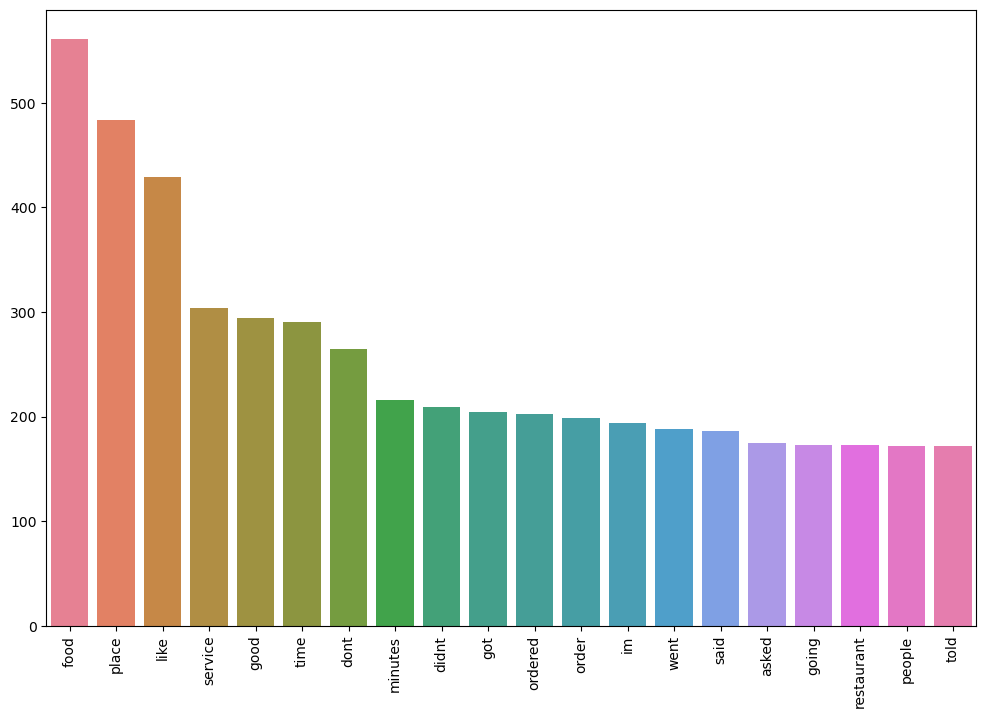

In [67]:
data= Counter(kc.split()).most_common(20)
data=dict(data)
plt.figure(figsize=(12,8))
sns.barplot(x=data.keys(),y=data.values(),hue=data.keys())
plt.xticks(rotation=90);